> This is a rework of my task during Computer Vision class in 2022.

> Goal(s):
- to demonstrate steps of finding interest points using SIFT, then compare the result between cv2.BFMatchers and cv2.FLANN for feature matching.

# Import Library

In [1]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# Image Preparation

In [2]:
url = 'https://d2wetaaf29185a.cloudfront.net/webp/m0cha-uuxahp2xiP/uploads/product/19131/19131_1637121015.0024__540x540.jpg.webp'
url_2 = 'https://caritau.com/storage/posts/8eBseJ3vU8rPFaN6wGOpt0wqlxK8Wd87.jpg'

In [3]:
def generate_img(url):
  req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
  img_data = urllib.request.urlopen(req).read()
  img_array = np.frombuffer(img_data, np.uint8)
  img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
  return img

In [4]:
def show_img(img, title, cmap=None):
  plt.imshow(img, cmap=cmap)
  plt.title(title)
  plt.axis('off')

In [5]:
img = cv2.cvtColor(generate_img(url), cv2.COLOR_BGR2GRAY)
img_obj = cv2.cvtColor(generate_img(url_2), cv2.COLOR_BGR2GRAY)

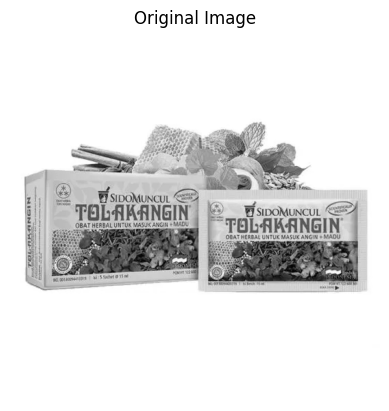

In [6]:
show_img(img, 'Original Image', 'gray')

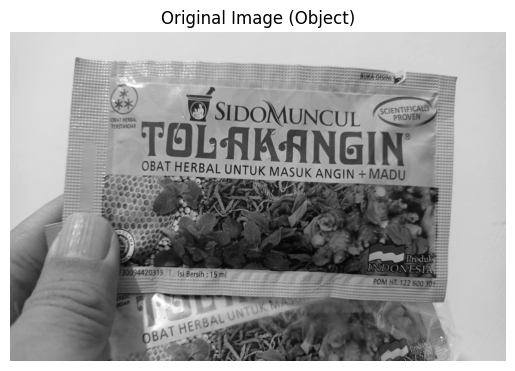

In [7]:
show_img(img_obj, 'Original Image (Object)', 'gray')

# SIFT with CV2

## Gaussian Blur (Object)

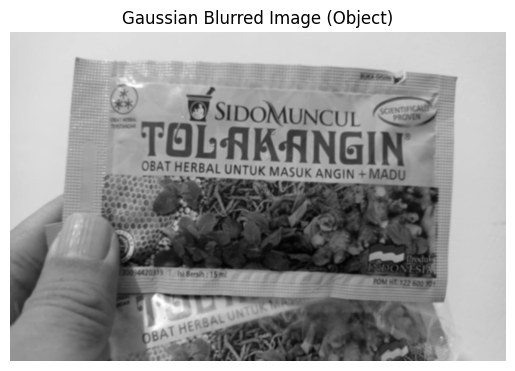

In [8]:
img_obj = cv2.GaussianBlur(img_obj, (5, 5), 0)
show_img(img_obj, 'Gaussian Blurred Image (Object)', 'gray')

## Generate Keypoints and Descriptor (Object)

In [9]:
SIFT = cv2.SIFT_create()

In [10]:
obj_keypoints, obj_descriptor = SIFT.detectAndCompute(img_obj, None)
obj_descriptor = obj_descriptor.astype('f')
img_obj = cv2.drawKeypoints(img_obj, obj_keypoints, None)

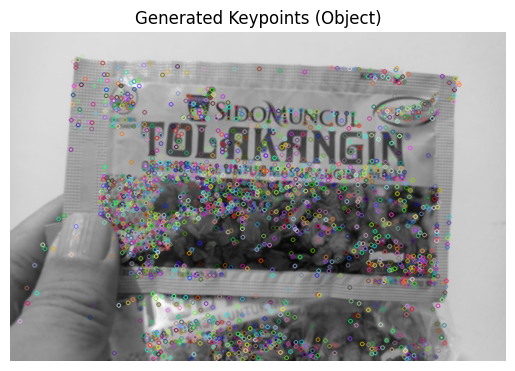

In [11]:
show_img(img_obj, 'Generated Keypoints (Object)', 'gray')

## Gaussian Blur (Image)

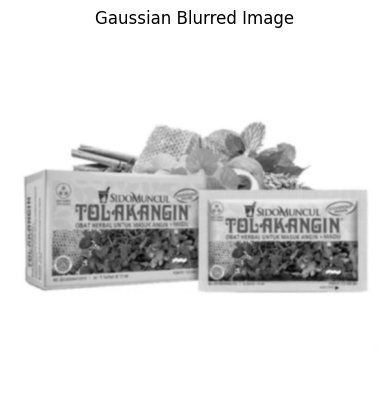

In [12]:
img = cv2.GaussianBlur(img, (5, 5), 0)
show_img(img, 'Gaussian Blurred Image', 'gray')

## Generate Keypoints and Descriptor (Image)

In [13]:
img_keypoints, img_descriptor = SIFT.detectAndCompute(img, None)
img_descriptor = img_descriptor.astype('f')
img = cv2.drawKeypoints(img, img_keypoints, None)

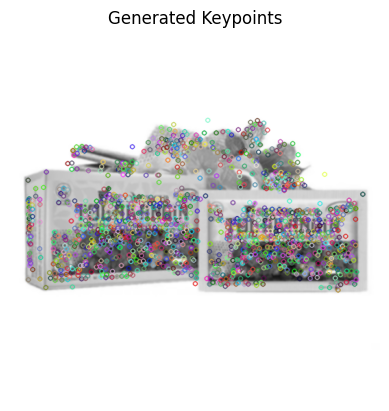

In [14]:
show_img(img, 'Generated Keypoints', 'gray')

# Feature Matching

## with FLANN

In [15]:
def feature_match_FLANN(img, img_keypoints, img_descriptor, img_obj, obj_keypoints, obj_descriptor, thresh=0.7):
  FLANN = cv2.FlannBasedMatcher(dict(algorithm = 0), dict(checks=50))
  matches = FLANN.knnMatch(img_descriptor, obj_descriptor, 2)

  match_mask = [[0, 0]] * len(matches)
  for j, (a, b) in enumerate(matches):
    if (a.distance < b.distance * thresh):
      match_mask[j] = [1, 0]
  img_FLANN = cv2.drawMatchesKnn(
    img_obj, obj_keypoints,
    img, img_keypoints,
    matches, None,
    [255, 0, 0],
    [0, 255, 0],
    match_mask
  )
  return img_FLANN

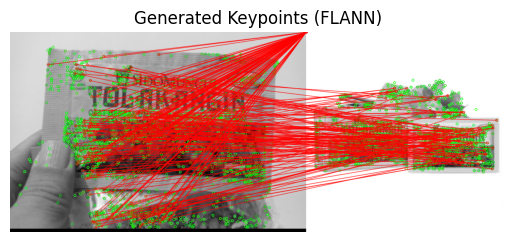

In [16]:
img_FLANN = feature_match_FLANN(img, img_keypoints, img_descriptor, img_obj, obj_keypoints, obj_descriptor)
show_img(img_FLANN, 'Generated Keypoints (FLANN)', 'gray')

## with BFM

In [17]:
def feature_match_BFM(img, img_keypoints, img_descriptor, img_obj, obj_keypoints, obj_descriptor, thresh=0.7):
  BFM = cv2.BFMatcher()
  matches = BFM.knnMatch(img_descriptor, obj_descriptor, 2)

  good_match = []
  for a, b in matches:
    if (a.distance < b.distance * thresh):
      good_match.append([a])
  img_BFM = cv2.drawMatchesKnn(
    img_obj, obj_keypoints,
    img, img_keypoints,
    good_match, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
  )
  return img_BFM

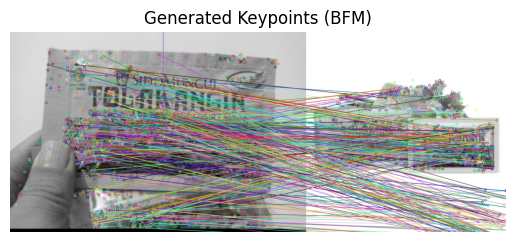

In [18]:
img_BFM = feature_match_BFM(img, img_keypoints, img_descriptor, img_obj, obj_keypoints, obj_descriptor)
show_img(img_BFM, 'Generated Keypoints (BFM)', 'gray')

# Result

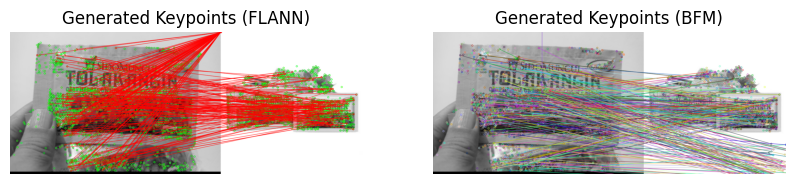

: 

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
show_img(img_FLANN, 'Generated Keypoints (FLANN)', 'gray')
plt.subplot(1, 2, 2)
show_img(img_BFM, 'Generated Keypoints (BFM)', 'gray')

> BFM matches more features than FLANN does, but it seems that FLANN gets more accuracy (in feature match) rather than BFM.